<a href="https://colab.research.google.com/github/SamariaSpringfield/MAT421_/blob/main/ModuleH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Module H | Ordinary Differential Equations**

*Section 22.1-6*

Differential equations are relationships between a function and its derivatives, and they are used to model systems in every engineering and science field. In this Module we will look at ordinary differential equations with specified initial values, a subclass of differential equations problems called initial value problems.

**22.1 ODE Initial Value Problem Statement**

A differential equation is a relationship between a function, 𝑓(𝑥), its independent variable, 𝑥, and any number of its derivatives. 

ODEs deal with differential equations in 2D space.

A partial differential equation or PDE is a general form differential equation where 𝑥 is a vector containing the independent variables

A solution to an ODE given an initial value is called the initial value problem.

**22.2 Reduction of Order**

In cases of higher-order differential equations it may be necessary to reduce the order to conform to an intial value method; methods that are typically designed for first-order equations.

To reduce the order of a differential equation we use a vector, 𝑆(𝑡), which is the state of the system as a function of time.

The matrix form: dS(t)/dt = [ 0, 1; -g/l, 0]S(t)

**22.3 Euler Method**

Euler's method is used for approximating solutions to certain differential equations and works by approximating a solution curve with line segments.

S(t_jplus1) = S(t_j) + h*F(t_j , S(t_j))

Implicit Euler Formula : S(t_jplus1) = S(t_j) + hF(t_jplus1, S_jplus1)

<ipython-input-7-60b1eaa2f155>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


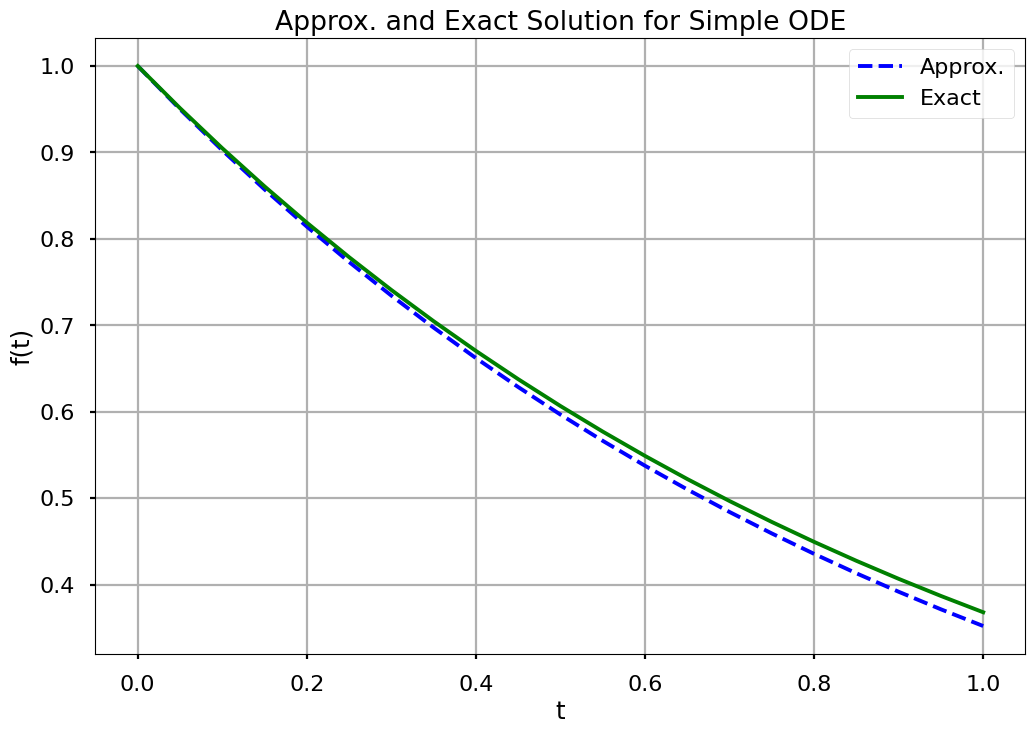

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')
%matplotlib inline

# Define parameters
f = lambda t, s: -np.exp(-t)
h = 0.05 
t = np.arange(0, 1 + h, h)
s0 = 1

s = np.zeros(len(t))
s[0] = s0

for i in range(0, len(t) - 1):
      s[i + 1] = s[i] + h*f(t[i], s[i])

plt.figure(figsize = (12, 8))
plt.plot(t, s, 'b--', label='Approx.')
plt.plot(t, np.exp(-t), 'g', label='Exact')
plt.title('Approx. and Exact Solution for Simple ODE')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid()
plt.legend(loc='upper right')
plt.show()
     

**22.4 Numerical Error and Instability**

Integration schemes for ordinary differential equations have to be taken with regard to accuracy and stability. Accuracy refers to the schemes exactness and stability is a schemes ability to keep the error from growing given time.

In [1]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

%matplotlib inline 


<ipython-input-1-c8f64572e20b>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


<ipython-input-3-f66745d59dfd>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


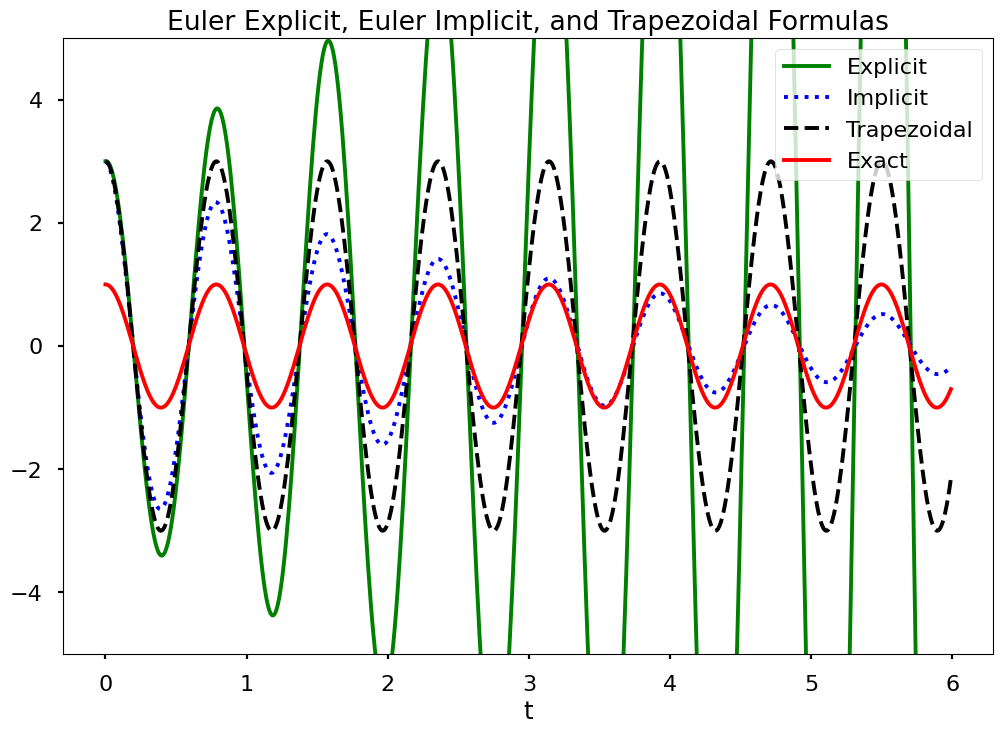

In [3]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

%matplotlib inline 


h1 = 0.01

t = np.arange(0, 6, h1)

w2 = 8

s0 = np.array([[3], [0]])

me = np.array([[1, h1], 
               [-w2**2*h1, 1]])
mi = inv(np.array([[1, -h1], 
               [w2**2*h1, 1]]))
mt = np.dot(inv(np.array([[1, -h1/2], 
    [w2**2*h1/2,1]])), np.array(
      [[1,h1/2], [-w2**2*h1/2, 1]]))

se = np.zeros((len(t), 2))

si = np.zeros((len(t), 2))

st = np.zeros((len(t), 2))


se[0, :] = s0.T
si[0, :] = s0.T
st[0, :] = s0.T

for j in range(0, len(t)-1):
    se[j+1, :] = np.dot(me,se[j, :])
    si[j+1, :] = np.dot(mi,si[j, :])
    st[j+1, :] = np.dot(mt,st[j, :])
    
plt.figure(figsize = (12, 8))
plt.title("Euler Explicit, Euler Implicit, and Trapezoidal Formulas")
plt.plot(t,se[:,0],'g-')
plt.plot(t,si[:,0],'b:')
plt.plot(t,st[:,0],'k--')
plt.plot(t, np.cos(w2*t), 'r')
plt.ylim([-5, 5])
plt.xlabel('t')
plt.ylabel('')
plt.legend(['Explicit', 'Implicit', \
            'Trapezoidal', 'Exact'])
plt.show()


**22.5 Predictor-Corrector and Runge Kutta Methods**

To improve the approximation accuracy of any state and time function we can use a predictor and corrector method. The **predictor** is an explicit formula and first estimates the solution at 𝑡𝑗+1. The **corrector** can be applied to improve accuracy after obtaining the solution S(t_jplus1)

The **Midpoint Method** Has a predictor step which is the prediction of the solution value halfway between t_j and t_jplus1. It then computes the corrector step using the derivative from S(t_j + h/2). S(t_j + h/2) = S(t_j) + (h/2)F(t_j , S(t_j))


**Runge Kutta** (RK) is one of the most used method for solving ordinary differential equation. **Fourth order Runge Kutta** (RK4) Obtained from the Taylor series using four points k1, k2, k3, and k4. A weighted average is used to find the approximation of the solution, which is O(h^4) (4th order accurate)



**22.6 Python ODE Solvers**

Pythin features several built in methods for solving ODEs, the most common is the scipy.integrate.solve_ivp function.

The syntax is as follows : solve_ivp(fun, t_span, s0, method = 'RK45', t_eval=None)

Below we will use scipy.integrate.solve_ivp to solve ODEs.

<ipython-input-4-f4c243f7bab8>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


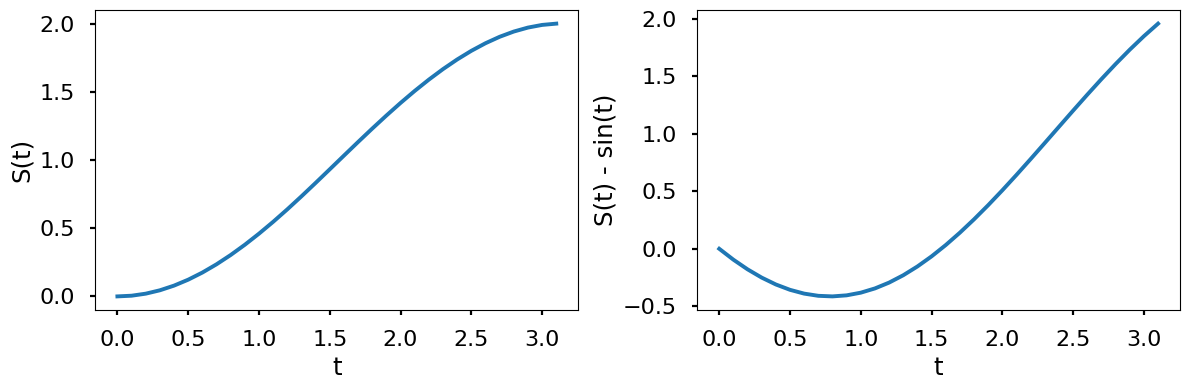

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

plt.style.use('seaborn-poster')

%matplotlib inline

F = lambda t, s: np.sin(t)

t_eval = np.arange(0, np.pi, 0.1)
sol = solve_ivp(F, [0, np.pi], [0], t_eval=t_eval)

plt.figure(figsize = (12, 4))
plt.subplot(121)
plt.plot(sol.t, sol.y[0])
plt.xlabel('t')
plt.ylabel('S(t)')
plt.subplot(122)
plt.plot(sol.t, sol.y[0] - np.sin(sol.t))
plt.xlabel('t')
plt.ylabel('S(t) - sin(t)')
plt.tight_layout()
plt.show()

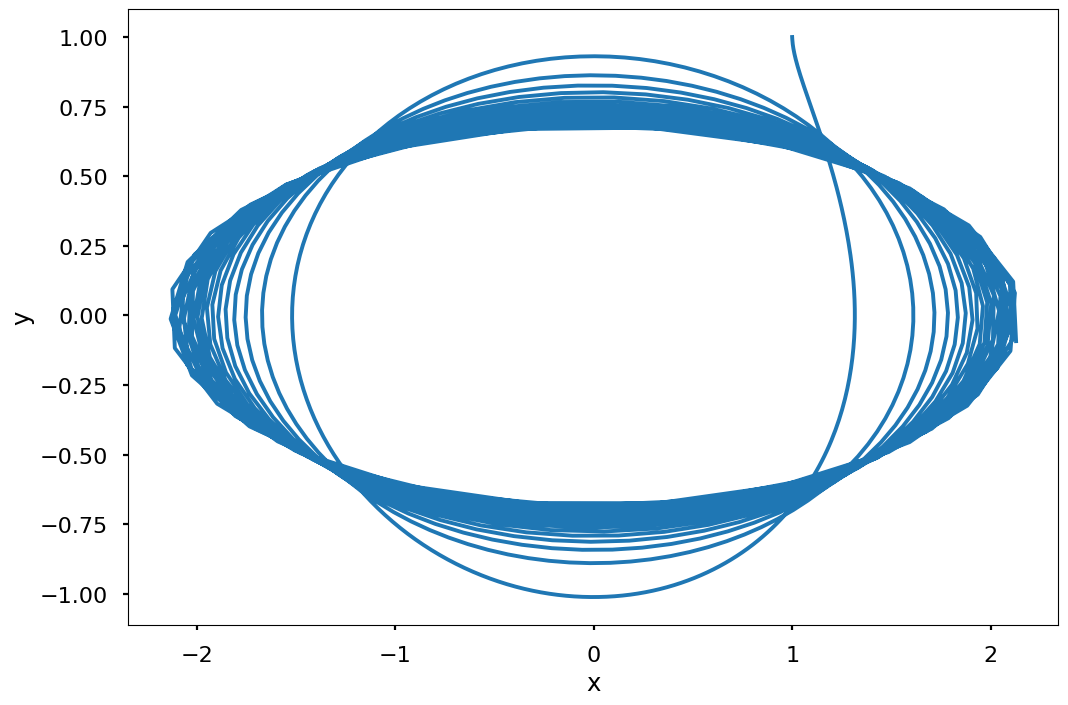

In [5]:
F = lambda t, s: np.dot(np.array([[0, t**2], [-t, 0]]), s)

t_eval = np.arange(0, 10.01, 0.01)
sol = solve_ivp(F, [0, 10], [1, 1], t_eval=t_eval)

plt.figure(figsize = (12, 8))
plt.plot(sol.y.T[:, 0], sol.y.T[:, 1])
plt.xlabel('x')
plt.ylabel('y')
plt.show()